### <font color="DodgerBlue">hw5pr2 digits cleaner</font>

Suggestions:
+ set up this file and the example iris_cleaner (or your births_cleaner) file side-by-side...
+ for each cell, copy it over...
   + edit it and make adjustments to suit the births problem (as needed)
   + run it to make sure it works... and you obtain your cleaned digits data.

Hints:
+ This data set is almost completely clean -- ***tidy*** in data-science parlance 
+ So, the goal of this is building familiarity. 
+ That is, no new tricks or situations are added here...

In [2]:
#
# hw5pr2digits_cleaner:  digit-data cleaning...
#

In [1]:
#
# *** SUGGESTION ***  
# 
# +++ copy-paste-and-alter from the iris- and/or births-cleaning notebooks into here +++
#
# when the data is ready to view, you might want to grab
# the digits-visualization code (it's in the gdoc hw page)
#

In [4]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [5]:
# read in our spreadsheet (csv)
filename = 'digits.csv'
df = pd.read_csv(filename)        # encoding="utf-8" et al.
print(f"{filename} : file read into a pandas dataframe.")

digits.csv : file read into a pandas dataframe.


In [6]:
#
# a dataframe is a "spreadsheet in Python"   (note that extra column at the right!)
#
# let's view it:
df

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit,excerpted from http://yann.lecun.com/exdb/mnist/
0,0,0,9,14,8,1,0,0,0,0,...,0,0,11,16,15,11,1,0,8,NaN
1,0,0,11,12,0,0,0,0,0,2,...,0,0,9,12,13,3,0,0,9,NaN
2,0,0,1,9,15,11,0,0,0,0,...,0,0,1,10,13,3,0,0,0,NaN
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,1,13,16,1,0,1,NaN
4,0,0,5,12,1,0,0,0,0,0,...,0,0,3,11,8,13,12,4,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,2,14,15,9,0,0,9,NaN
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,6,16,14,6,0,0,0,NaN
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,2,9,13,6,0,0,8,NaN
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,5,12,16,12,0,0,9,NaN


In [7]:
# let's look at the dataframe's "info":
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 66 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   pix0                                              1768 non-null   int64  
 1   pix1                                              1768 non-null   int64  
 2   pix2                                              1768 non-null   int64  
 3   pix3                                              1768 non-null   int64  
 4   pix4                                              1768 non-null   int64  
 5   pix5                                              1768 non-null   int64  
 6   pix6                                              1768 non-null   int64  
 7   pix7                                              1768 non-null   int64  
 8   pix8                                              1768 non-null   int64  
 9   pix9               

In [8]:
# Let's look at the dataframe's columns:
df.columns

Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pix17', 'pix18', 'pix19', 'pix20', 'pix21', 'pix22', 'pix23', 'pix24',
       'pix25', 'pix26', 'pix27', 'pix28', 'pix29', 'pix30', 'pix31', 'pix32',
       'pix33', 'pix34', 'pix35', 'pix36', 'pix37', 'pix38', 'pix39', 'pix40',
       'pix41', 'pix42', 'pix43', 'pix44', 'pix45', 'pix46', 'pix47', 'pix48',
       'pix49', 'pix50', 'pix51', 'pix52', 'pix53', 'pix54', 'pix55', 'pix56',
       'pix57', 'pix58', 'pix59', 'pix60', 'pix61', 'pix62', 'pix63',
       'actual_digit', 'excerpted from http://yann.lecun.com/exdb/mnist/'],
      dtype='object')

In [11]:
# we can drop a series of data (a row or a column)
# the dimensions each have a numeric value, row~0, col~1, but let's use readable names we define:
ROW = 0        
COLUMN = 1     

# We are dropping this final column - it was just a citation...
df_clean1 = df.drop('excerpted from http://yann.lecun.com/exdb/mnist/', axis=COLUMN)
df_clean1
# df_clean1 is a new dataframe, without that unwanted column

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [12]:
#
# let's call it df_tidy 
#
df_tidy =  df_clean1

In [13]:
#
# That's it!  Then, and write it out to iris_cleaned.csv

# We'll construct the new filename:
old_filename_without_extension = filename[:-4]                      # remove the ".csv"

cleaned_filename = old_filename_without_extension + "_cleaned.csv"  # name-creating
print(f"cleaned_filename is {cleaned_filename}")

# Now, save the dataframe names df_tidy
df_tidy.to_csv(cleaned_filename, index_label=False)  # no "index" column...

cleaned_filename is digits_cleaned.csv


In [14]:
#
# Let's make sure this worked, by re-reading in the data...
#

# let's re-read that file and take a look...
df_tidy_reread = pd.read_csv(cleaned_filename)   # encoding="utf-8" et al.
print(f"{cleaned_filename} : file read into a pandas dataframe.")
df_tidy_reread

digits_cleaned.csv : file read into a pandas dataframe.


,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


pixels as 1d numpy array (row):
 [ 0  0  0 10 11  0  0  0  0  0  9 16  6  0  0  0  0  0 15 13  0  0  0  0
  0  0 14 10  0  0  0  0  0  1 15 12  8  2  0  0  0  0 12 16 16 16 10  1
  0  0  7 16 12 12 16  4  0  0  0  9 15 12  5  0]

pixels as 2d numpy array (image):
 [[ 0  0  0 10 11  0  0  0]
 [ 0  0  9 16  6  0  0  0]
 [ 0  0 15 13  0  0  0  0]
 [ 0  0 14 10  0  0  0  0]
 [ 0  1 15 12  8  2  0  0]
 [ 0  0 12 16 16 16 10  1]
 [ 0  0  7 16 12 12 16  4]
 [ 0  0  0  9 15 12  5  0]]


<Axes: >

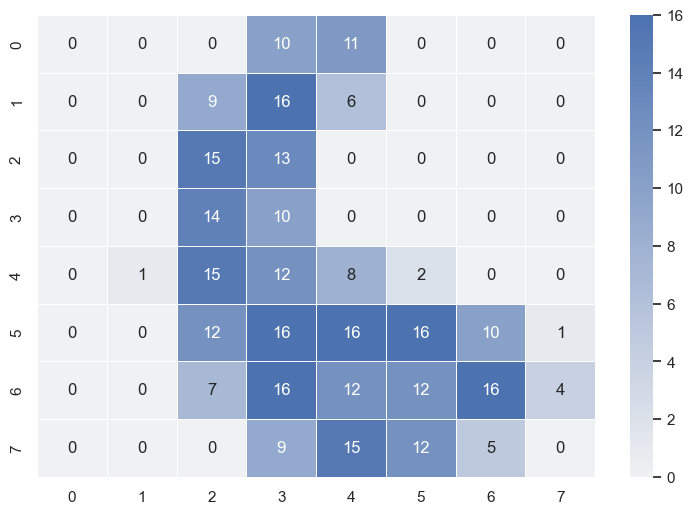

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_theme()


# Load the example flights dataset and convert to CS35_Participant_2-form
digits_orig = pd.read_csv('./digits.csv')
list_of_column_names = digits_orig.columns


ROW = 0
COLUMN = 1
digits2 = digits_orig.drop( list_of_column_names[-1], axis=COLUMN)  # drop the rightmost column - it's just a url!
digitsA = digits2.values  # get a numpy array (digitsA) from the dataframe (digits2)


row_to_show = 42   # choose the digit (row) you want to show...


pixels_as_row = digitsA[row_to_show,0:64]

print("pixels as 1d numpy array (row):\n", pixels_as_row)


pixels_as_image = np.reshape(pixels_as_row, (8,8))   # reshape into a 2d 8x8 array (image)
print("\npixels as 2d numpy array (image):\n", pixels_as_image)


# create the figure, f, and the axes, ax:
f, ax = plt.subplots(figsize=(9, 6))


# colormap choice! Fun!   www.practicalpythonfordatascience.com/ap_seaborn_palette or seaborn.pydata.org/tutorial/color_palettes.html
our_colormap = sns.color_palette("light:b", as_cmap=True) 


# Draw a heatmap with the numeric values in each cell (make annot=False to remove the values)
sns.heatmap(pixels_as_image, annot=True, fmt="d", linewidths=.5, ax=ax, cmap=our_colormap)